In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from six.moves import cPickle 
%matplotlib inline 

Visualization: Randomly select and visualize 5-6 images (no need to include
all the classes).

In [4]:
#data loaded in batches 
files = {'batch1': 'data_batch_1',
             'batch2': 'data_batch_2',
             'batch3': 'data_batch_3',
             'batch4': 'data_batch_4',
             'batch5': 'data_batch_5'
             }

#display the batches 
def stats(filename,sample_id):
    file = open(filename,'rb')
    data = cPickle.load(file, encoding='latin') 
    file.close()
    resX=data['data']
    resY=data['labels']
    print(len(resY)) #resY - list
    for y in set(resY):
        print(y,resY.count(y), end = '  ')
    
#example result 
stats(files["batch3"],4)


def getImageData(filename):
    file = open(filename,'rb')
    data = cPickle.load(file, encoding='latin') 
    file.close()
    res=data['data'].reshape((len(data['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return res


    

10000
0 994  1 1042  2 965  3 997  4 990  5 1029  6 978  7 1015  8 961  9 1029  

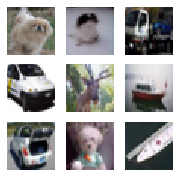

In [5]:
images = getImageData(files["batch3"])
fig, axes1 = plt.subplots(3,3,figsize=(3,3))
for j in range(3):
    for k in range(3):
        i = np.random.choice(range(len(images)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(images[i,:])
    

Data exploration: Count the number of samples per class in the training data.

In [12]:
print("Batch 1")
stats(files["batch1"],4)


Batch 1
10000
0 1005  1 974  2 1032  3 1016  4 999  5 937  6 1030  7 1001  8 1025  9 981  

In [7]:
print("Batch 2")
stats(files["batch2"],4)

Batch 2
10000
0 984  1 1007  2 1010  3 995  4 1010  5 988  6 1008  7 1026  8 987  9 985  

In [8]:
print("Batch 3")
stats(files["batch3"],4)

Batch 3
10000
0 994  1 1042  2 965  3 997  4 990  5 1029  6 978  7 1015  8 961  9 1029  

In [9]:
print("Batch 4")
stats(files["batch4"],4)

Batch 4
10000
0 1003  1 963  2 1041  3 976  4 1004  5 1021  6 1004  7 981  8 1024  9 983  

In [10]:
print("Batch 5")
stats(files["batch5"],4)

Batch 5
10000
0 1014  1 1014  2 952  3 1016  4 997  5 1025  6 980  7 977  8 1003  9 1022  

Image classification with FNNs: In this part, you will use a feedforward
neural network (FNN) (also called “multilayer perceptron”) to perform the object classification
task. The input of the FNN comprises of all the pixels of the image. Use one of the five batches
of the training data as a validation set.

Experiment on the validation set with different FNN hyper-parameters, e.g.
 #layers, #nodes per layer, activation function, dropout, weight regularization, etc. Choose 3
hyper-parameter combinations and for each combination, please do the following: (1) monitor
the loss on the train and validation set across the epochs of the FNN training; (2) report the
final classification accuracy on the training and validation sets; (3) report the running time for
training the FNN; (4) report the # parameters that are learned for each FNN.
Note: If running the FNN takes a long time, you can subsample the training data (i.e., choose
a random set of samples from training) or sub-sample the input images to a smaller size (e.g.,
24 ×24).

In [37]:
def normalize(image):
    maximum = np.max(image)
    minimum = np.min(image)
    res = (image-minimum)/(maximum-minimum)
    return res
# A List of Labels (0-9) integers representing 10 different type of Images needs to encoded.
# Encoding is actually an identity matrix of dimensions 10 X 10


def encoding(label):
    maxValue = np.max(label)
    res = np.eye(maxValue+1)[label]
    return res
# Uncomment to see how one hot encoding on an example set looks like
print(encoding([1,2,3,4,5,6,7,8,9,1,2,3,4]))

def preProcess():
    valid_features = []
    valid_labels = []
    for (filename,path) in files.items():
        file = open(path,'rb')
        data = cPickle.load(file,encoding='latin') 
        file.close()
        features = data['data'].reshape((len(data['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
        labels =data['labels']
        valid_count = int(len(features)*0.1) # Note len(features) gives the value of dim 0 for numpy array
        
        feature_set = normalize(features[:-valid_count]) # Take only 90% and normalize it
        label_set = encoding(labels[:-valid_count])
        
        valid_features.extend(features[-valid_count:]) # Add Remaining 10% to validation Features
        valid_labels.extend(labels[-valid_count:])
        
        cPickle.dump((feature_set,label_set),open("preprocess "+filename,'wb'))
        
    valid_features = normalize(np.array(valid_features)) #@TODO :Not sure as to how this works
    valid_labels = encoding(np.array(valid_labels))
    
    cPickle.dump((valid_features,valid_labels),open("preprocess_valid",'wb'))
    
preProcess()
    

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [74]:
def loadData(filename,batchSize):
    filename="preprocess_"+filename
    file = open(filename,'rb')
    features, labels = cPickle.load(file)
    for start in range(0,len(features),batchSize):
        end = min(start+batchSize,len(features))
        yield features[start:end],labels[start:end]

In [75]:
batches = 5
samplesBatch = 10000
sampleNum = batches*samplesBatch
classes = 10
hidden1 = 256
hidden2 = 128
inputNum = 32*32*3

In [76]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

resX = tf.placeholder("float",[None,inputNum])
resY = tf.placeholder("float",[None,classes])

stddev = 0.1

weights = {
    'hidden1': tf.Variable(tf.random_normal([inputNum,hidden1],stddev=0.1)),
    'hidden2': tf.Variable(tf.random_normal([hidden1,hidden2],stddev=0.1)),
    'out':tf.Variable(tf.random_normal([hidden2,classes],stddev=0.1))
}

biases = {
    'bias1' : tf.Variable(tf.random_normal([hidden1],stddev=0.1)),
    'bias2' : tf.Variable(tf.random_normal([hidden2],stddev=0.1)),
    'out': tf.Variable(tf.random_normal([classes],stddev=0.1))
}

print ("NETWORK READY")

NETWORK READY


In [77]:
def multiLayerPerceptron(X,weights,biases):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, weights['hidden1']),biases['bias1']))
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1,weights['hidden2']),biases['bias2']))
    out = tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return out
    

In [78]:
pred = multiLayerPerceptron(resX,weights,biases)
pred

<tf.Tensor 'Add_11:0' shape=(?, 10) dtype=float32>

In [85]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=resY))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
corr = tf.equal(tf.argmax(pred,1),tf.argmax(resY,1))
accuracy = tf.reduce_mean(tf.cast(corr,'float'))

init = tf.global_variables_initializer()
valid_features, valid_labels = cPickle.load(open('preprocess_valid', mode='rb'))

In [86]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(50):
        for (filename,path) in files.items():
            for file,l in loadData(filename,1024):
                sess.run(optimizer,feed_dict={resX:file.reshape(len(file),3072),resY:l})
            c = sess.run(cost,feed_dict={resX:file.reshape(len(file),3072),resY:l})
            acc = sess.run(accuracy,feed_dict={resX:valid_features.reshape(len(valid_features),3072),resY:valid_labels})
            if(epoch%10 == 0):
                print("Epoch =",epoch," Cost = ",c," Accuracy = ", acc)
        
        

Epoch = 0  Cost =  2.337737  Accuracy =  0.0978
Epoch = 0  Cost =  2.2470915  Accuracy =  0.1618
Epoch = 0  Cost =  2.1315668  Accuracy =  0.164
Epoch = 0  Cost =  2.0795074  Accuracy =  0.1902
Epoch = 0  Cost =  2.0611346  Accuracy =  0.1954
Epoch = 10  Cost =  1.8443263  Accuracy =  0.3254
Epoch = 10  Cost =  1.7889245  Accuracy =  0.336
Epoch = 10  Cost =  1.7941082  Accuracy =  0.3214
Epoch = 10  Cost =  1.7824278  Accuracy =  0.3266
Epoch = 10  Cost =  1.8344325  Accuracy =  0.3244
Epoch = 20  Cost =  1.745889  Accuracy =  0.3684
Epoch = 20  Cost =  1.695201  Accuracy =  0.3618
Epoch = 20  Cost =  1.6751151  Accuracy =  0.374
Epoch = 20  Cost =  1.6887618  Accuracy =  0.3722
Epoch = 20  Cost =  1.7033653  Accuracy =  0.371
Epoch = 30  Cost =  1.697962  Accuracy =  0.377
Epoch = 30  Cost =  1.6516994  Accuracy =  0.377
Epoch = 30  Cost =  1.6358463  Accuracy =  0.3754
Epoch = 30  Cost =  1.6641247  Accuracy =  0.3692
Epoch = 30  Cost =  1.6210729  Accuracy =  0.3774
Epoch = 40  Cos

Image classification with CNNs: In this part, you will use a convolutional
neural network (CNN) to perform the object classification task.


Experiment on the validation set with different CNN hyper-parameters, e.g.
#layers, filter size, stride size, activation function, dropout, weight regularization, etc. Choose
3 hyper-parameter combinations and for each combination, please do the following: (1) monitor
the loss on the train and validation set across the epochs of the CNN training; (2) report the
final classification accuracy on the training and validation sets; (3) report the running time for
training the CNN; (4) report the # parameters that are learned for each CNN. How do these
metrics compare to the FNN?

Run the best model that was found based on the validation set from question
(d.i) on the testing set. Report the classification accuracy on the testing set. How does this
metric compare to the FNN?

Image classification with FNNs: In this part, you will use a feedforward
neural network (FNN) (also called “multilayer perceptron”) to perform the object classification
task. The input of the FNN comprises of all the pixels of the image. Use one of the five batches
of the training data as a validation set.


Experiment on the validation set with different FNN hyper-parameters, e.g. #layers, #nodes per layer, activation function, dropout, weight regularization, etc. Choose 3 hyper-parameter combinations and for each combination, please do the following: 
(1) monitor the loss on the train and validation set across the epochs of the FNN training; 
(2) report the final classification accuracy on the training and validation sets; 
(3) report the running time for training the FNN; 
(4) report the # parameters that are learned for each FNN.
Note: If running the FNN takes a long time, you can subsample the training data (i.e., choose
a random set of samples from training) or sub-sample the input images to a smaller size (e.g.,
24 ×24).

Run the best model that was found based on the validation set from question
 on the testing set. Report the classification accuracy on the testing set. Report the
confusion matrix for each class.
Note: The confusion matrix is a 10×10 matrix; its rows correspond to the actual labels for
each class, while its columns correspond to the predicted classes. Element (i, j) includes the
number of samples that belonged to the ith class and were predicted as the jth class. In a perfect
classification task, the non-diagonal elements of the matrix will be all non-zero.